In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# get in quads folder

In [8]:
BeamMomentum =  "0.1" #"2.0001" # 3.574

In [9]:
quads_directory_path = "/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/"

quads_families = os.listdir(quads_directory_path)

temp = os.listdir(quads_directory_path)
FilesForChosenMomentum = []
for file in temp:
    if "%s"%BeamMomentum in file:
        FilesForChosenMomentum.append(file)
        
FitFiles, StrenghtFiles, quads_families = [], [], []
for file in FilesForChosenMomentum:
    if "FIT" in file:
        FitFiles.append(file)
    elif "NormStrenght" in file:
        StrenghtFiles.append(file)
    elif "StrenghtsQuadrupoles" in file:
        pass
    else:
        quads_families.append(file)

In [10]:
quads_families = ["QDC", "QDN", "QDS", "QDW7", "QDW9", "QFC", "QFNS", "QFN", "QFW6", "QFW8"]
print(quads_families)

['QDC', 'QDN', 'QDS', 'QDW7', 'QDW9', 'QFC', 'QFNS', 'QFN', 'QFW6', 'QFW8']


# compare measures with fit

In [11]:
def LinearLaw (x, a, b):
    y = a*x + b
    return y

Text(0, 0.5, '$K_1$ [$1/m^2$]')

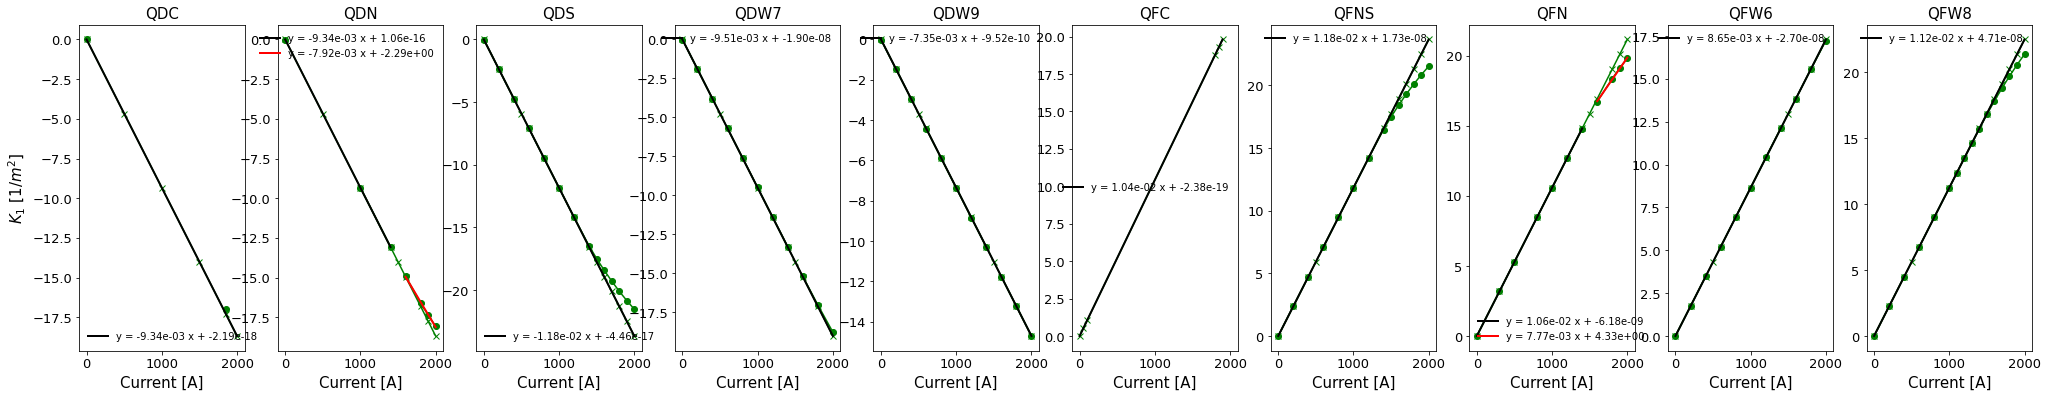

In [12]:
os.chdir(quads_directory_path)
SaturationCurrent = 1500

f, ax_q = plt.subplots(1, len(quads_families), figsize = (35,6), sharex = True, sharey = False)

for i_quad, quad in enumerate(quads_families):
    
    df_strenght = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/Quads_%s_NormStrenght_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    df_fit = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/FIT_Quads_%s_StrenghtCurrent_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Calculated, "x-g")
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Measured, "o-g")
    
    if df_fit["saturation_1250A"].values[0] == 0:
        ax_q[i_quad].plot(df_strenght.Current, LinearLaw(df_strenght.Current, *df_fit["linear"].values), "-k", lw = 2,
                          label = "y = %1.2e x + %1.2e"%(df_fit["linear"].values[0], df_fit["linear"].values[1]))
        ax_q[i_quad].legend(frameon = False)
    else:
        ax_q[i_quad].plot(df_strenght[df_strenght.Current < SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current < SaturationCurrent].Current, 
                                                                                                  *df_fit["linear"].values), "-k", lw = 2, label = "y = %1.2e x + %1.2e"%(df_fit["linear"].values[0], df_fit["linear"].values[1]))
        ax_q[i_quad].plot(df_strenght[df_strenght.Current > SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current > SaturationCurrent].Current, 
                                                                                                  *df_fit["saturation_1250A"].values), "-r", lw = 2, label = "y = %1.2e x + %1.2e"%(df_fit["saturation_1250A"].values[0], df_fit["saturation_1250A"].values[1]))
        ax_q[i_quad].legend(frameon = False)
    ax_q[i_quad].set_xlabel ("Current [A]", size = 15)
    ax_q[i_quad].tick_params (axis = "both", which = "major", labelsize = 13)
    ax_q[i_quad].set_title("%s"%quad, size = 15)
ax_q[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)

# write block to get the desired strenght from current value

In [13]:
df = pd.DataFrame()
df["NameCircuit"] = []
df["CurrentValue_inA"] = []
for quad in quads_families:
    df["%s"%quad] = []

In [14]:
df

,NameCircuit,CurrentValue_inA,QDC,QDN,QDS,QDW7,QDW9,QFC,QFNS,QFN,QFW6,QFW8


In [16]:
##############               Q-main1    Qmain2   Qtrim1  Qtrim2   Qtrim3   Qtrim4  Qtrim5
if BeamMomentum == "3.574":
    ## These values refer to the 3.57GeV/c plateau
    AllInputValueCurrent = [1812.881, 1127.270, 35.392, 221.905, 49.300, 195.740, 52.211]
elif BeamMomentum == "2.0001":
    ## These values refer to the 2GeV/c plateau
    AllInputValueCurrent = [ 968.72,   618.915, 40.944, 140.645, 23.893,  41.786, 85.006]
elif BeamMomentum == "0.3":
    ## These values refer to the 300 MeV/c plateau
    AllInputValueCurrent = [ 144.126,   90.715,  8.719,  24.534,  3.937,  12.519, 11.065]
elif BeamMomentum == "0.1":
    ## These values refer to the 300 MeV/c plateau
    AllInputValueCurrent = [  46.656,   30.219,  3.806,   7.808,  1.880,   2.405,  5.844]

For the input value of 46.656000 (circuit Qmain1) the strenght for each quad family is:

QDC --> -0.4357920
QDN --> -0.4357920
QDS --> -0.5520032
QDW7 --> -0.4438623
QDW9 --> -0.3429845
QFC --> 0.4864540
QFNS --> 0.5520033
QFN --> 0.4938976
QFW6 --> 0.4035111
QFW8 --> 0.5245645
For the input value of 30.219000 (circuit Qmain2) the strenght for each quad family is:

QDC --> -0.2822616
QDN --> -0.2822616
QDS --> -0.3575314
QDW7 --> -0.2874887
QDW9 --> -0.2221504
QFC --> 0.3150753
QFNS --> 0.3575314
QFN --> 0.3198965
QFW6 --> 0.2613534
QFW8 --> 0.3397594
For the input value of 3.806000 (circuit Qtrim1) the strenght for each quad family is:

QDC --> -0.0355501
QDN --> -0.0355501
QDS --> -0.0450301
QDW7 --> -0.0362084
QDW9 --> -0.0279792
QFC --> 0.0396829
QFNS --> 0.0450301
QFN --> 0.0402901
QFW6 --> 0.0329167
QFW8 --> 0.0427918
For the input value of 7.808000 (circuit Qtrim2) the strenght for each quad family is:

QDC --> -0.0729309
QDN --> -0.0729309
QDS --> -0.0923791
QDW7 --> -0.0742815

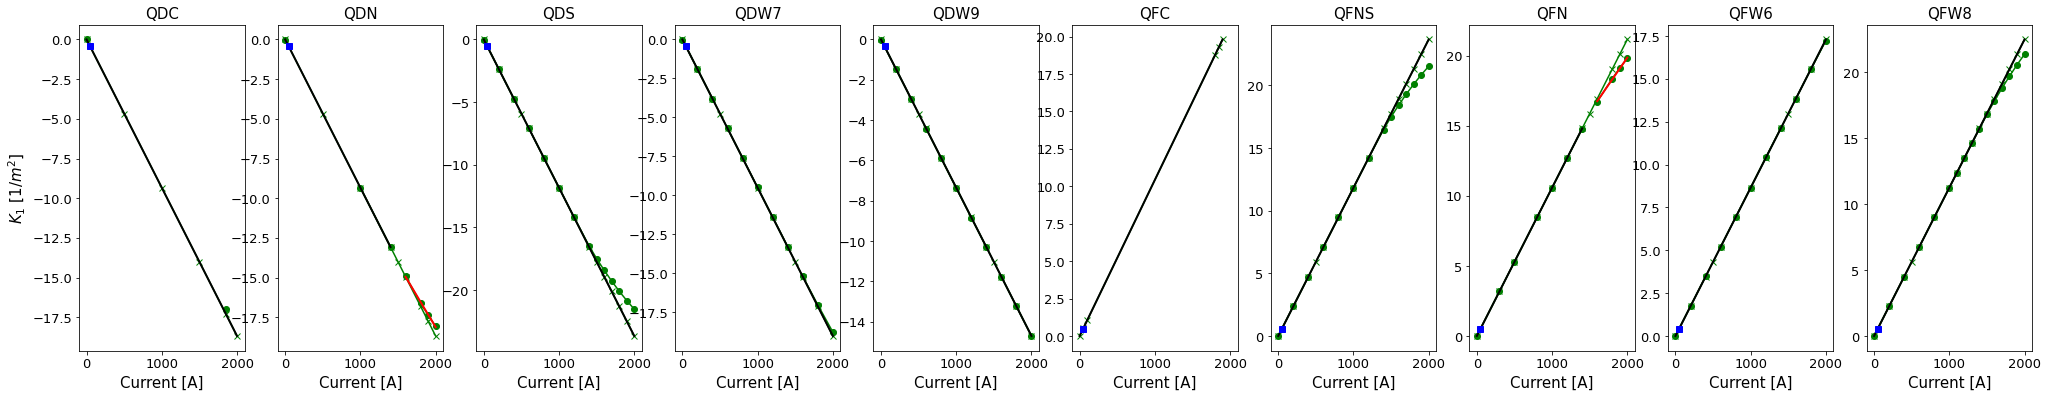

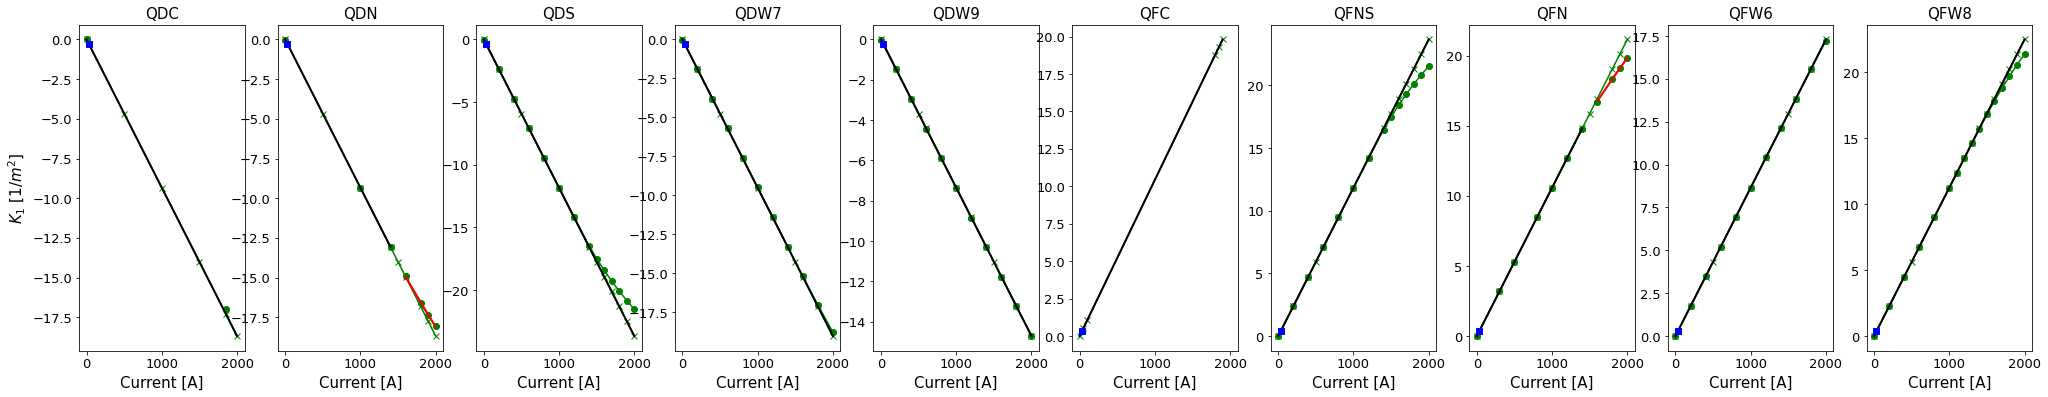

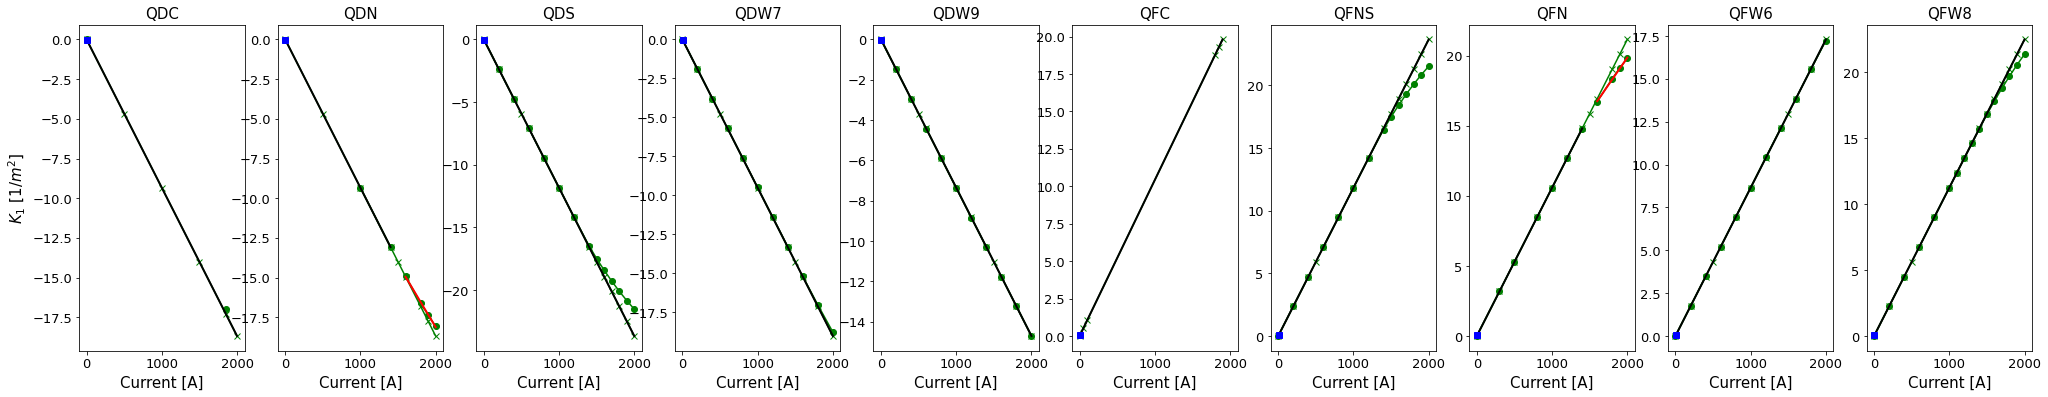

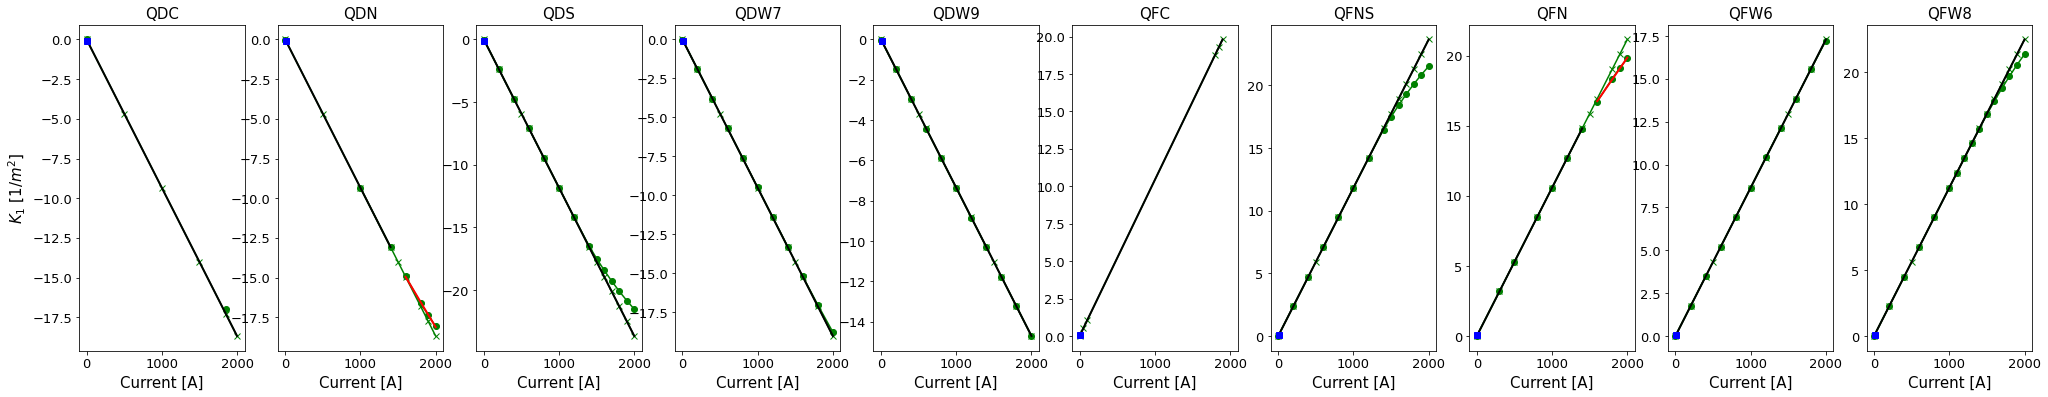

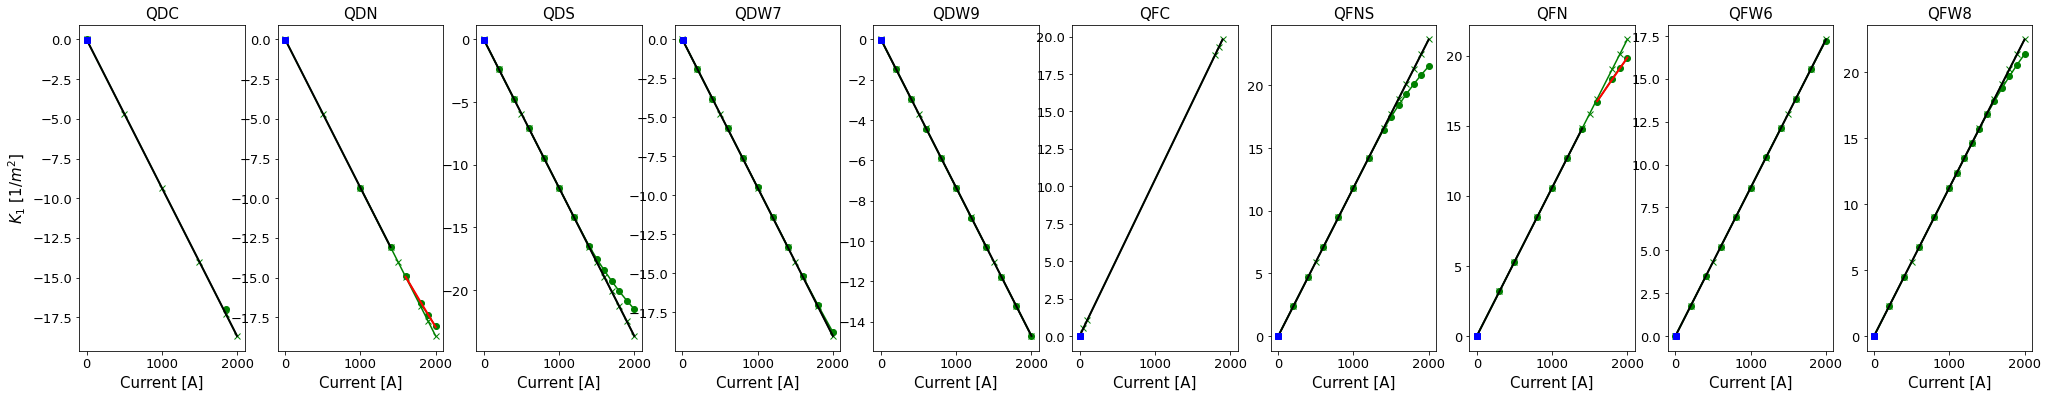

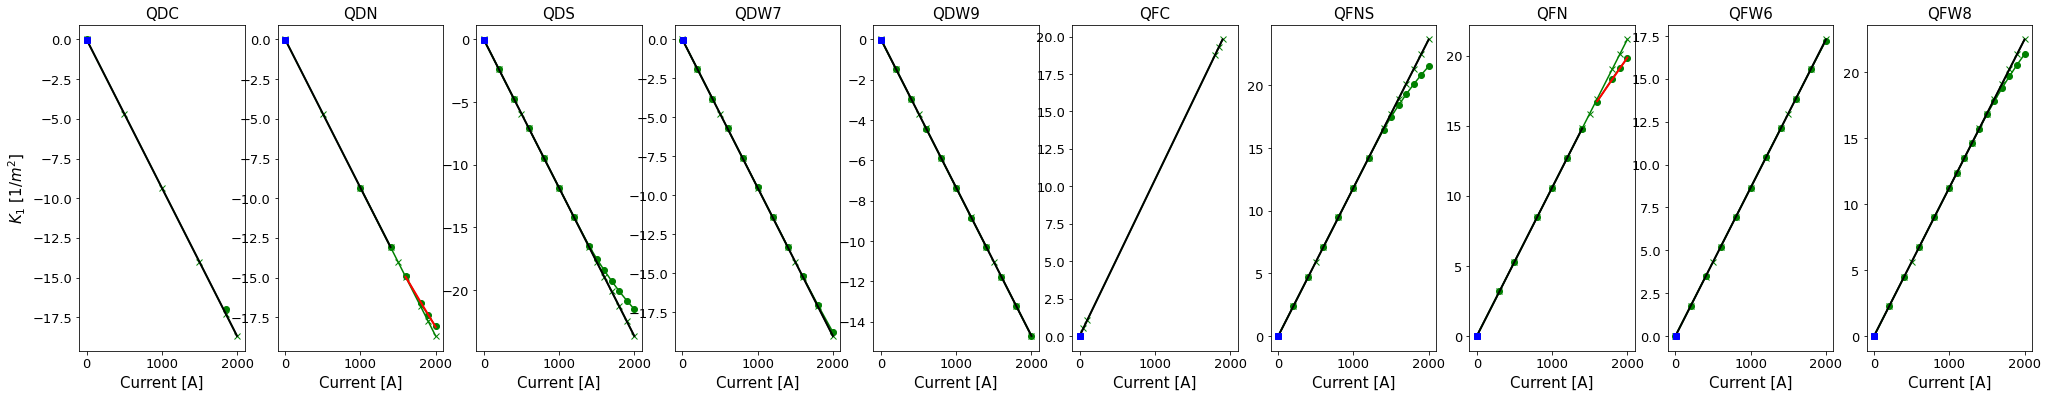

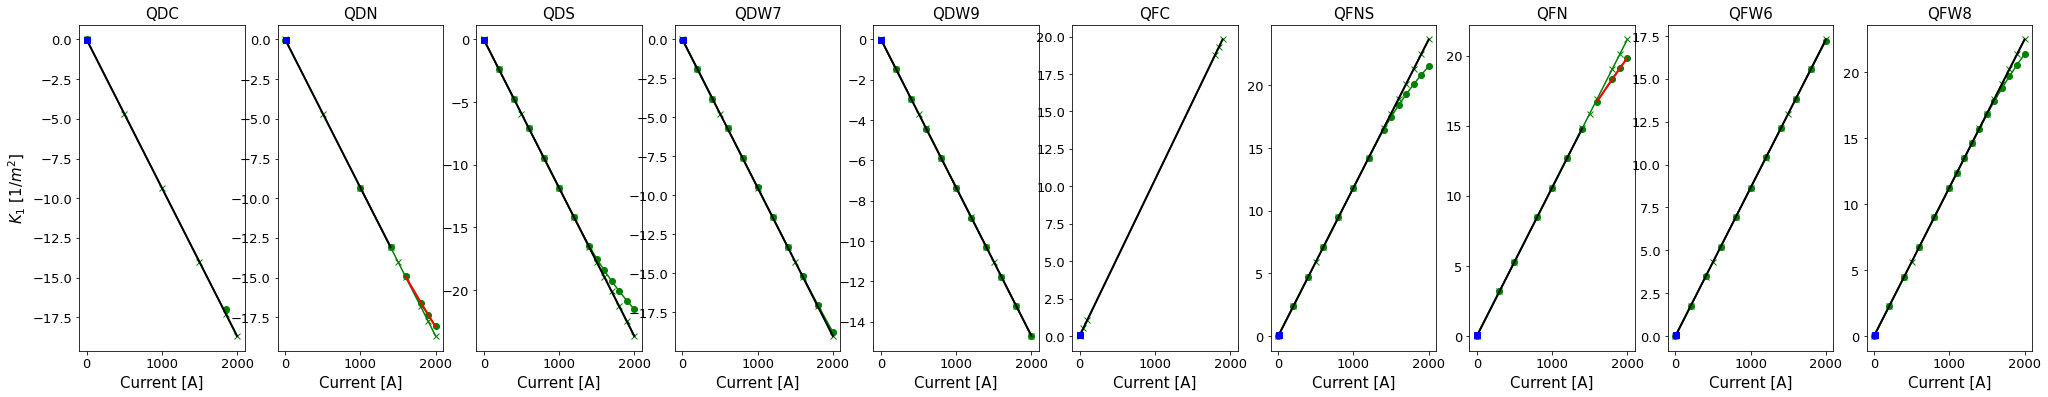

In [17]:
df["NameCircuit"] = ["Qmain1", "Qmain2", "Qtrim1", "Qtrim2", "Qtrim3", "Qtrim4", "Qtrim5"]
df["CurrentValue_inA"] = AllInputValueCurrent

for h, InputValueCurrent in enumerate(AllInputValueCurrent):
    f, ax_q = plt.subplots(1, len(quads_families), figsize = (35,6), sharex = True, sharey = False)
    print("For the input value of %f"%InputValueCurrent, "(circuit %s)"%df["NameCircuit"].values[h], "the strenght for each quad family is:\n")

    AllStrenght_AtInputCurrent = []
    
    for i_quad, quad in enumerate(quads_families):
        Strenght_AtInputCurrent = 0.
        
        df_strenght = pd.read_csv("%s"%StrenghtFiles[i_quad])
        df_fit = pd.read_csv("%s"%FitFiles[i_quad])
    
        ax_q[i_quad].plot(df_strenght.Current, df_strenght.Calculated, "x-g")
        ax_q[i_quad].plot(df_strenght.Current, df_strenght.Measured, "o-g")

        if df_fit["saturation_1250A"].values[0] == 0:
            ax_q[i_quad].plot(df_strenght.Current, LinearLaw(df_strenght.Current, *df_fit["linear"].values), "-k", lw = 2)
            saturation = False
        else:
            saturation = True
            ax_q[i_quad].plot(df_strenght[df_strenght.Current < SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current < SaturationCurrent].Current, 
                                                                                                      *df_fit["linear"].values), "-k", lw = 2)
            ax_q[i_quad].plot(df_strenght[df_strenght.Current > SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current > SaturationCurrent].Current, 
                                                                                                      *df_fit["saturation_1250A"].values), "-r", lw = 2)

        if (InputValueCurrent < SaturationCurrent) or ( (InputValueCurrent > SaturationCurrent) and saturation == False ):
            Strenght_AtInputCurrent = LinearLaw(InputValueCurrent, *df_fit["linear"].values)
            ax_q[i_quad].plot(InputValueCurrent, Strenght_AtInputCurrent,  "sb")
            print(quad, "--> %1.7f"%Strenght_AtInputCurrent)
        else:
            Strenght_AtInputCurrent = LinearLaw(InputValueCurrent, *df_fit["saturation_1250A"].values)
            ax_q[i_quad].plot(InputValueCurrent, Strenght_AtInputCurrent,  "sb")
            print(quad, "--> %1.7f"%Strenght_AtInputCurrent)
        
        AllStrenght_AtInputCurrent = np.append(AllStrenght_AtInputCurrent, Strenght_AtInputCurrent)
        
        ax_q[i_quad].set_xlabel ("Current [A]", size = 15)
        ax_q[i_quad].tick_params (axis = "both", which = "major", labelsize = 13)
        ax_q[i_quad].set_title("%s"%quad, size = 15)
        
#         np.array(df.iloc[h].values[2+i_quad], dtype=float)
#         df.iloc[h].values[2+i_quad] = 10
        df.loc[h, "%s"%quad] = Strenght_AtInputCurrent
        
    ax_q[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)

In [19]:
df

,NameCircuit,CurrentValue_inA,QDC,QDN,QDS,QDW7,QDW9,QFC,QFNS,QFN,QFW6,QFW8
0,Qmain1,46.656,-0.435792,-0.435792,-0.552003,-0.443862,-0.342984,0.486454,0.552003,0.493898,0.403511,0.524565
1,Qmain2,30.219,-0.282262,-0.282262,-0.357531,-0.287489,-0.222150,0.315075,0.357531,0.319897,0.261353,0.339759
2,Qtrim1,3.806,-0.035550,-0.035550,-0.045030,-0.036208,-0.027979,0.039683,0.045030,0.040290,0.032917,0.042792
3,Qtrim2,7.808,-0.072931,-0.072931,-0.092379,-0.074281,-0.057399,0.081409,0.092379,0.082655,0.067529,0.087787
4,Qtrim3,1.880,-0.017560,-0.017560,-0.022243,-0.017885,-0.013821,0.019602,0.022243,0.019902,0.016259,0.021137
5,Qtrim4,2.405,-0.022464,-0.022464,-0.028454,-0.022880,-0.017680,0.025075,0.028454,0.025459,0.020800,0.027040
6,Qtrim5,5.844,-0.054586,-0.054586,-0.069142,-0.055597,-0.042961,0.060932,0.069142,0.061864,0.050543,0.065706


In [20]:
df["QDC"].iloc[[1,2,3,4,5,6]] = np.nan
df["QDN"].iloc[[1,2,3,4,5,6]] = np.nan
df["QDS"].iloc[[1,2,3,4,5,6]] = np.nan
df["QDW7"].iloc[[1,2,4,5,6]] = np.nan
df["QDW9"].iloc[[1,2,4,5,6]] = np.nan
df["QFC"].iloc[[1,2,3,4,5]] = np.nan
df["QFN"].iloc[[1,2,3,4,5,6]] = np.nan
df["QFNS"].iloc[[2,3,4,6]] = np.nan
df["QFW6"].iloc[[1,3,4,5,6]] = np.nan
df["QFW8"].iloc[[1,2,3,5,6]] = np.nan

/cvmfs/sft.cern.ch/lcg/views/LCG_102b_nxcals_pro_pytimber_pro/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
df

,NameCircuit,CurrentValue_inA,QDC,QDN,QDS,QDW7,QDW9,QFC,QFNS,QFN,QFW6,QFW8
0,Qmain1,46.656,-0.435792,-0.435792,-0.552003,-0.443862,-0.342984,0.486454,0.552003,0.493898,0.403511,0.524565
1,Qmain2,30.219,NaN,NaN,NaN,NaN,NaN,NaN,0.357531,NaN,NaN,NaN
2,Qtrim1,3.806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032917,NaN
3,Qtrim2,7.808,NaN,NaN,NaN,-0.074281,-0.057399,NaN,NaN,NaN,NaN,NaN
4,Qtrim3,1.880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021137
5,Qtrim4,2.405,NaN,NaN,NaN,NaN,NaN,NaN,0.028454,NaN,NaN,NaN
6,Qtrim5,5.844,NaN,NaN,NaN,NaN,NaN,0.060932,NaN,NaN,NaN,NaN


In [22]:
LinearLaw(11., 3.31e-4, 1.47e-11)

0.0036410000147

In [28]:
df.to_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/AD_StrenghtsQuadrupolesFor%sGeV.csv"%str(BeamMomentum), index = False)

# write block to get the current from strenght value:

In [ ]:
AllInputValueStrenght = [ 0.5188233 , -0.54735788,  0.57680013, -0.36727852,  0.54735788,
                         -0.4665887 , -0.46099835,  0.52982209,  0.43541476,  0.55305042,
                         -0.40846634, -0.52860349]

In [92]:
InputValueStrenght = np.abs(-0.55815376)

For the input value of 0.558154 the current for each quad family is:

QDC --> 2135.682
QDN --> 2230.690
QDS --> 1789.709
QDW7 --> 2129.171
QDW9 --> 2716.151
QFC --> 1913.261
QFNS --> 1789.709
QFN --> 2009.431
QFW6 --> 2319.018
QFW8 --> 1833.957


Text(0, 0.5, '$K_1$ [$1/m^2$]')

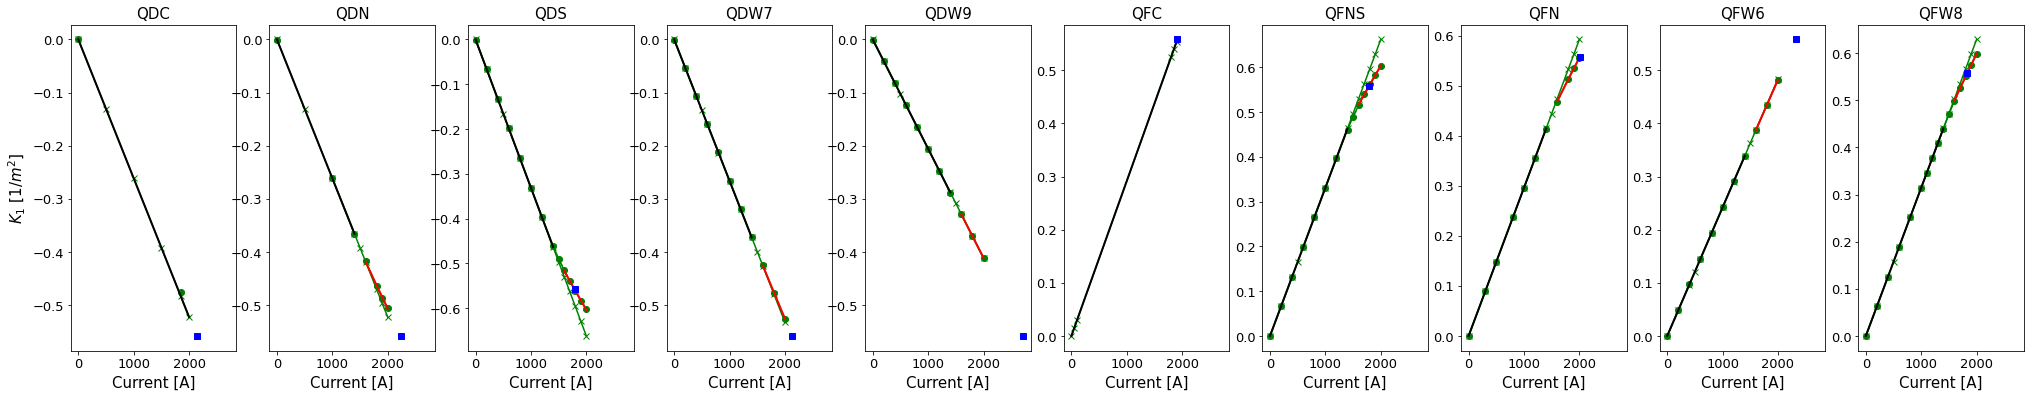

In [93]:
f, ax_q = plt.subplots(1, len(quads_families), figsize = (35,6), sharex = True, sharey = False)
print("For the input value of %f"%np.abs(InputValueStrenght), "the current for each quad family is:\n")

for i_quad, quad in enumerate(quads_families):
    
    if "D" in quad:
        sign_strenght = -1
    else:
        sign_strenght = 1
    
    df_strenght = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/Quads_%s_NormStrenght_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)
    df_fit = pd.read_csv("/eos/home-r/russogi/WINDOWS/Desktop/AD_ELENA_scripts_data/AD_MagneticModel/quadrupoles/FIT_Quads_%s_StrenghtCurrent_%s_GeV.csv"%(quad, str(BeamMomentum)), index_col = False)   
    
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Calculated, "x-g")
    ax_q[i_quad].plot(df_strenght.Current, df_strenght.Measured, "o-g")
    
    if df_fit["saturation_1250A"].values[0] == 0:
        ax_q[i_quad].plot(df_strenght.Current, LinearLaw(df_strenght.Current, *df_fit["linear"].values), "-k", lw = 2)
        saturation = False
    else:
        saturation = True
        ax_q[i_quad].plot(df_strenght[df_strenght.Current < SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current < SaturationCurrent].Current, 
                                                                                                  *df_fit["linear"].values), "-k", lw = 2)
        ax_q[i_quad].plot(df_strenght[df_strenght.Current > SaturationCurrent].Current, LinearLaw(df_strenght[df_strenght.Current > SaturationCurrent].Current, 
                                                                                                  *df_fit["saturation_1250A"].values), "-r", lw = 2, label = "y = %1.2e x + %1.2e"%(df_fit["saturation_1250A"].values[0], df_fit["saturation_1250A"].values[1]))
    
    if saturation == False:
        Current_AtInputStrenght = ((InputValueStrenght*sign_strenght - df_fit["linear"].values[-1])
                                   /(df_fit["linear"].values[0]))
    else:
        SaturationStrenght = np.abs(LinearLaw(1250, *df_fit["saturation_1250A"].values))
        if InputValueStrenght >= SaturationStrenght:
            Current_AtInputStrenght = ((InputValueStrenght*sign_strenght - df_fit["saturation_1250A"].values[-1])
                                   /(df_fit["saturation_1250A"].values[0]))
        else:
            Current_AtInputStrenght = ((InputValueStrenght*sign_strenght - df_fit["linear"].values[-1])
                                   /(df_fit["linear"].values[0]))
    ax_q[i_quad].plot(Current_AtInputStrenght, InputValueStrenght*sign_strenght,  "sb")
    print(quad, "--> %1.3f"%Current_AtInputStrenght)
    
#     if (InputValueStrenght*sign_strenght < SaturationStrenght) or ( (InputValueStrenght*sign_strenght > SaturationStrenght) and saturation == False ):
        
#     else:
#         Current_AtInputStrenght = (InputValueStrenght*sign_strenght- df_fit["linear"].values[-1])/(df_fit["linear"].values[0])
#         ax_q[i_quad].plot(Current_AtInputStrenght, InputValueStrenght*sign_strenght,  "sb")
#         print(quad, "--> %1.3f"%Current_AtInputStrenght)
        
    ax_q[i_quad].set_xlabel ("Current [A]", size = 15)
    ax_q[i_quad].tick_params (axis = "both", which = "major", labelsize = 13)
    ax_q[i_quad].set_title("%s"%quad, size = 15)
ax_q[0].set_ylabel ("$K_1$ [$1/m^2$]", size = 15)